#### Example 3: Two dimensional nonlinear model
$$\begin{align*}
\begin{cases}
x_{n+1}=x_n+\eta \begin{bmatrix} & \sin((0.3x_n^1+0.5 x_n^2)\alpha_n) \\ & \sin(0.3x_n^2\alpha_n) \end{bmatrix} +\sqrt{\eta}\Sigma w_n \\
y_{n+1} = y_n +\eta G x_n +\sqrt{\eta}\Sigma_1 v_n
\end{cases}
\end{align*}$$

In [56]:
import Ex3_loader
import Ex3_generator
import numpy as np
import sys
sys.path.append('..')
import nn_DF
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [57]:
PATH_TRAIN='../datas/Ex3Train.pklz'

x0=np.array([[1],[-1]])

N=100; n0=10; dimX=2; eta=0.04; dimY=2

training_data, validation_data, test_data,\
data_mean, data_std, label_mean, label_std=Ex3_loader.load_data_wrapper(PATH_TRAIN)

# Prepare test data to predict
test_data_data=[x for x, y in test_data]
test_data_label=[y for x, y in test_data]
test_data_label=np.array(test_data_label)
test_data_label=test_data_label.reshape(len(test_data_label),2)
len(training_data)

16956

In [58]:
# The num of first layer is n0*dimY, the num of last layer is dimX.
net=nn_DF.Network([n0*dimY, 32, 16, 8, 8, dimX])
epoch=200

In [59]:
# train with adaptive leanrning alogrithm
tcMSE_EpochAdalr1,tcRel_EpochAdalr1, ecMSE_EpochAdalr1, ecRel_EpochAdalr1, w_EpochAdalr1, b_EpochAdalr1, EpochAdalr1\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.001, 0.001, 0.01, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr5, tcRel_EpochAdalr5, ecMSE_EpochAdalr5, ecRel_EpochAdalr5, w_EpochAdalr5, b_EpochAdalr5, EpochAdalr5\
=net.SGD_EpochAdalr(training_data,  epoch, 64, 0.005, 0.001, 0.01, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr10, tcRel_EpochAdalr10, ecMSE_EpochAdalr10, ecRel_EpochAdalr10, w_EpochAdalr10, b_EpochAdalr10, EpochAdalr10\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.01, 0.001, 0.01, monitor_cost=True,evaluation_data=validation_data)

-----------------------------
Epoch Adaptive lr begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.0010482206499102633
Epoch 0: 0.3491204780723303
The eta of Epoch 1 is 0.0010905048711366651
Epoch 1: 0.3273353884311909


KeyboardInterrupt: 

In [ ]:
# train with constant learning rate
tcMSE_constlr1, tcRel_constlr1, ecMSE_constlr1, ecRel_constlr1, w_constlr1, b_constlr1,constlr1\
=net.SGD_Constlr(training_data, epoch, 64, 0.001, evaluation_data=validation_data)
tcMSE_constlr5, tcRel_constlr5, ecMSE_constlr5, ecRel_constlr5, w_constlr5, b_constlr5, constlr5\
=net.SGD_Constlr(training_data, epoch, 64, 0.005, evaluation_data=validation_data)
tcMSE_constlr10, tcRel_constlr10, ecMSE_constlr10, ecRel_constlr10, w_constlr10, b_constlr10, constlr10\
=net.SGD_Constlr(training_data, epoch, 64, 0.01, evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.001
Epoch 0: 0.34886696253192506
The eta of Epoch 1 is 0.001
Epoch 1: 0.32813518296362004
The eta of Epoch 2 is 0.001
Epoch 2: 0.30755889494726246
The eta of Epoch 3 is 0.001
Epoch 3: 0.28506172837223676
The eta of Epoch 4 is 0.001
Epoch 4: 0.2615818678474571
The eta of Epoch 5 is 0.001
Epoch 5: 0.23728711246154774
The eta of Epoch 6 is 0.001
Epoch 6: 0.21409200413208446
The eta of Epoch 7 is 0.001
Epoch 7: 0.1939840078856013
The eta of Epoch 8 is 0.001
Epoch 8: 0.17866531129720584
The eta of Epoch 9 is 0.001
Epoch 9: 0.1671331567121752
The eta of Epoch 10 is 0.001
Epoch 10: 0.15852999845862567
The eta of Epoch 11 is 0.001
Epoch 11: 0.15208826815592616
The eta of Epoch 12 is 0.001
Epoch 12: 0.14661427515181108
The eta of Epoch 13 is 0.001
Epoch 13: 0.1424159184522747
The eta of Epoch 14 is 0.001
Epoch 14: 0.1390232245187737
The eta of Epoch 15 is 0.001
Epoch 15: 0.1362498099322903

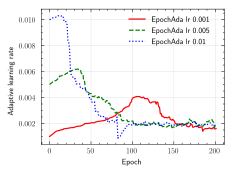

In [ ]:
epochs=np.linspace(0,epoch+1,epoch+1)
plt.style.reload_library()

with plt.style.context(['science.mplstyle','ieee.mplstyle']):
    plt.plot(epochs,EpochAdalr1, '#FB0006',epochs,EpochAdalr5,'g',epochs, EpochAdalr10,'b',linewidth=1.2)
    plt.grid(alpha=0.35)
    plt.legend(["EpochAda lr 0.001","EpochAda lr 0.005","EpochAda lr 0.01"],edgecolor="black")
    plt.xlabel("Epoch")
    plt.ylabel("Adaptive learning rate")
    
plt.savefig("../img/Ex3-lr.pdf", dpi=600,bbox_inches = 'tight')

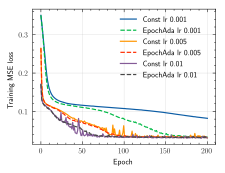

In [ ]:
Epochs=np.linspace(0,epoch,epoch)
plt.style.reload_library()
with plt.style.context(['science.mplstyle','ieee.mplstyle','std-colors.mplstyle']):    
    plt.plot(Epochs, tcMSE_constlr1, Epochs, tcMSE_EpochAdalr1,"--", Epochs, tcMSE_constlr5,\
         Epochs,tcMSE_EpochAdalr5,'--',Epochs, tcMSE_constlr10, Epochs, tcMSE_EpochAdalr10,'--', linewidth=1.2)
    plt.grid(alpha=0.35)
    plt.legend(["Const lr 0.001","EpochAda lr 0.001","Const lr 0.005","EpochAda lr 0.005","Const lr 0.01","EpochAda lr 0.01"],edgecolor="black")
    plt.xlabel("Epoch")
    plt.ylabel("Training MSE loss")
    
plt.savefig("../img/Ex3-loss.pdf", dpi=600,bbox_inches = 'tight')

In [ ]:
from sklearn.metrics import mean_squared_error
def relative_err(y_true, y_pred):
    """Compute Relative Error"""
    abs_sum=np.sum(np.abs(y_true-y_pred))
    return abs_sum/(np.sum(np.abs(y_true))+np.sum(np.abs(y_pred)))

def ComputeError(pred, label,label_mean, label_std, dimX):
    pred=np.array(pred)
    pred=pred.reshape(len(pred),dimX)
    for k in range(len(pred)):
        pred[k,:]=pred[k,:]*label_std+label_mean
    RelErr=relative_err(pred, label)
    mseErr=mean_squared_error(pred, label)
    print("MSE and RelErr are: {0},{1}".format(mseErr, RelErr))

In [ ]:
## Generate out-of-sample data to compute relative errors
N_sample=256
TotalDatas=[]; TotalLabels=np.zeros(((N-n0+2)*N_sample,dimX))
P= np.array([[0.98,0.02],[0.02,0.98]])

for i in range(N_sample):
    alpha=Ex3_generator.mChain(N,P)
    datas1, labels1, x_new1=Ex3_generator.generate_new_data(data_mean, data_std, alpha)
    TotalDatas.extend(datas1)
    x_new1=x_new1[n0-1:]
    TotalLabels[i*(N-n0+2):(i+1)*(N-n0+2)]=x_new1

In [ ]:
NewPred_constlr1=net.predict(TotalDatas, w_constlr1, b_constlr1, label=False)
NewPred_constlr5=net.predict(TotalDatas, w_constlr5, b_constlr5, label=False)
NewPred_constlr10=net.predict(TotalDatas, w_constlr10, b_constlr10, label=False)
NewPred_EpochAdalr1=net.predict(TotalDatas, w_EpochAdalr1, b_EpochAdalr1, label=False)
NewPred_EpochAdalr5=net.predict(TotalDatas, w_EpochAdalr5, b_EpochAdalr5, label=False)
NewPred_EpochAdalr10=net.predict(TotalDatas, w_EpochAdalr10, b_EpochAdalr10, label=False)

ComputeError(NewPred_constlr1, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_constlr5, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_constlr10, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr1, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr5, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr10, TotalLabels, label_mean, label_std, dimX)

MSE and RelErr are: 0.7732383129300825,0.13440047649991133
MSE and RelErr are: 0.30874306907644844,0.08517281765669545
MSE and RelErr are: 0.3023759334998706,0.08426338837331569
MSE and RelErr are: 0.32405210934762047,0.08839137368679008
MSE and RelErr are: 0.3138684116917404,0.0863020282417556
MSE and RelErr are: 0.3140958042501674,0.08629671863042898


##### Plot sample path


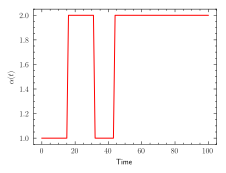

In [ ]:
np.random.seed(6)
ru=np.random.uniform(0,1,size=N)
P= np.array([[0.98,0.02],[0.02,0.98]])
alpha=Ex3_generator.mChain(N,P,ru)

datas, labels, x_new =Ex3_generator.generate_new_data(data_mean, data_std, alpha)

plt.style.reload_library()
with plt.style.context(['science','ieee']):
    plt.plot(alpha,'r')
    plt.xlabel("Time")
    plt.ylabel(r'$ \alpha (t) $')

# plt.savefig("../img/ex3-alpha.pdf", dpi=600,bbox_inches = 'tight')

In [14]:
tcMSE_constlr, tcRel_constlr, ecMSE_constlr, ecRel_constlr, w_constlr, b_constlr, constlr \
=net.SGD_Constlr(training_data, epoch, 64, 0.002, evaluation_data=validation_data)
tcMSE_EpochAdalr, tcRel_EpochAdalr, ecMSE_EpochAdalr, ecRel_EpochAdalr, w_EpochAdalr, b_EpochAdalr, EpochAdalr\
= net.SGD_EpochAdalr(training_data, epoch, 64, 0.002, 0.001, 0.01, evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.002
The eta of Epoch 0 is 0.002
Epoch 0: 0.32845446923677696
The eta of Epoch 1 is 0.002
Epoch 1: 0.28570892232208484
The eta of Epoch 2 is 0.002
Epoch 2: 0.23754586797299648
The eta of Epoch 3 is 0.002
Epoch 3: 0.19462049153658215
The eta of Epoch 4 is 0.002
Epoch 4: 0.16726358353966178
The eta of Epoch 5 is 0.002
Epoch 5: 0.15191002052543848
The eta of Epoch 6 is 0.002
Epoch 6: 0.14261628423990477
The eta of Epoch 7 is 0.002
Epoch 7: 0.13629746265470732
The eta of Epoch 8 is 0.002
Epoch 8: 0.13213623287896425
The eta of Epoch 9 is 0.002
Epoch 9: 0.12889449041541176
The eta of Epoch 10 is 0.002
Epoch 10: 0.12663615625684077
The eta of Epoch 11 is 0.002
Epoch 11: 0.12503706278196058
The eta of Epoch 12 is 0.002
Epoch 12: 0.12335417214408091
The eta of Epoch 13 is 0.002
Epoch 13: 0.12237589700201644
The eta of Epoch 14 is 0.002
Epoch 14: 0.12095369680650012
The eta of Epoch 15 is 0.002
Epoch 15: 0.11995415343

In [15]:
pr_const=net.predict(datas,w_constlr, b_constlr,label=False)
pr_const=np.array(pr_const)
pr_const=pr_const.reshape(len(pr_const),dimX)
for k in range(N-n0+2):
    pr_const[k,:]=pr_const[k,:]*label_std+label_mean
const_new=[x0 for k in range(n0-1)]
const_new=np.array(const_new)
const_new=const_new.reshape(n0-1,dimX)
const_new=np.vstack((const_new,pr_const))

In [16]:
pr_ada=net.predict(datas,w_EpochAdalr, b_EpochAdalr,label=False)
pr_ada=np.array(pr_ada)
pr_ada=pr_ada.reshape(len(pr_ada),dimX)
for k in range(N-n0+2):
    pr_ada[k,:]=pr_ada[k,:]*label_std+label_mean
ada_new=[x0 for k in range(n0-1)]
ada_new=np.array(ada_new)
ada_new=ada_new.reshape(n0-1,dimX)
ada_new=np.vstack((ada_new,pr_ada))

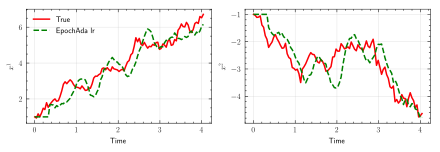

In [48]:
axis=np.linspace(0,eta*(N+1),N+1)

plt.style.reload_library()
with plt.style.context(['science','ieee']):
    fig, ax=plt.subplots(1,2,figsize=(6,2),constrained_layout=True)

    ax[0].plot(axis,x_new[:,0], '#FB0006', axis, ada_new[:,0], 'g', linewidth=1.5)
    ax[0].minorticks_on()
    ax[0].grid(alpha=0.35)
    ax[0].set_xlabel('Time'); ax[0].set_ylabel('$x^1$')

    ax[1].plot(axis, x_new[:,1], '#FB0006',axis, ada_new[:,1],'g',linewidth=1.5)
    ax[1].minorticks_on(); ax[1].grid(alpha=0.35)
    ax[1].set_xlabel('Time'); ax[1].set_ylabel('$x^2$')

    ax[0].legend(["True","EpochAda lr"],edgecolor="black",prop={'size':8})

plt.savefig("../img/ex3-path.pdf", dpi=600, bbox_inches = 'tight') 

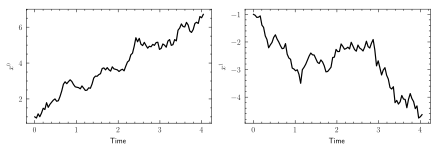

In [18]:
axis=np.linspace(0,eta*(N+1),N+1)

plt.style.reload_library()
with plt.style.context(['science','ieee']):

    fig, ax=plt.subplots(1,2,figsize=(6,2),constrained_layout=True)
    ax[0].plot(axis,x_new[:,0],linewidth=1.2)
    ax[0].minorticks_on()
    ax[0].set_xlabel('Time'); ax[0].set_ylabel('$x^0$')

    ax[1].plot(axis, x_new[:,1],linewidth=1.2)
    ax[1].minorticks_on()
    ax[1].set_xlabel('Time'); ax[1].set_ylabel('$x^1$')